<a href="https://colab.research.google.com/github/indrochoco/NYC-Taxi-prediction/blob/main/taxi_time_prediction_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.





For this project we are going to use these for EDA portion

1.   Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
2.   Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
3.   Matplotlib :- Basic visualization library that we need for plotting and graphs
4.   Seaborn :- For more customizable and advanced data visualization


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

<b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


In [23]:
path= '/content/drive/MyDrive/almabetter/Copy of NYC Taxi Data.csv'
taxi_data = pd.read_csv(path)

### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Dataset Inspection**

In [24]:
# Head of the data 
taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [25]:
taxi_data.shape #shape of the data set

(1458644, 11)

Inspecting the name of the features

In [26]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [27]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In the data set , there is no null value. 

Let's check if any duplicate column available

In [28]:
taxi_data[taxi_data.duplicated() == True]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [29]:
taxi_data.store_and_fwd_flag.unique() # checking the unique values of store_and_fwd_flag column

array(['N', 'Y'], dtype=object)

In [30]:
taxi_data.passenger_count.unique() # number of passenge unique values

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [31]:
taxi_data.describe() # describing the data set

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Converting pickup and drop off column to date time format

In [32]:
taxi_data['dropoff_datetime']= pd.to_datetime(taxi_data['dropoff_datetime'])
taxi_data['pickup_datetime']= pd.to_datetime(taxi_data['pickup_datetime'])

Replace the 'yes' and 'no' by 1 & 0 respectively .

In [33]:
# Encoding the values
value= {'store_and_fwd_flag':{'N':0,'Y':1}}
taxi_data= taxi_data.replace(value)

In [34]:
# Checking if any longitude value is 0 
taxi_data[taxi_data.dropoff_longitude==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


### Calucating the distance between two points

In [35]:
import geopy.distance # Importing Geopy library for calculating the distance between two points. 

In [36]:
# First creating an empty list
dist_list= [] 
for k in range(taxi_data.shape[0]):

    # Point one
    lat1 = taxi_data.pickup_latitude[k]
    lon1 = taxi_data.pickup_longitude[k]

    # Point two
    lat2 = taxi_data.dropoff_latitude[k]
    lon2 = taxi_data.dropoff_longitude[k]

    # calculate distance between two points
    coords_1 = (lat1,lon1)
    coords_2 = (lat2,lon2)
    distance= geopy.distance.vincenty(coords_1, coords_2).km  # gives distance
    dist_list.append(distance)

# adding distance column to the dataset 
taxi_data['distance']= dist_list

In [37]:
taxi_data['distance'] # checking the distance column

0          1.502172
1          1.808660
2          6.379687
3          1.483632
4          1.187038
             ...   
1458639    1.227090
1458640    6.046212
1458641    7.821532
1458642    1.092524
1458643    1.133655
Name: distance, Length: 1458644, dtype: float64

### **1. Univariate Analysis**

let's visualize the distribution of number of passenger through out the data set

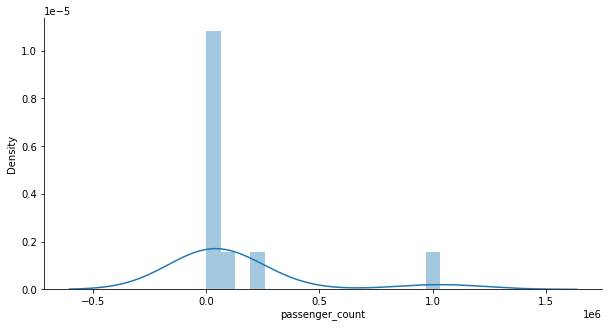

In [38]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.distplot(
    taxi_data['passenger_count'].value_counts()
    )

so , it was right skewed distribution

In [39]:
taxi_data['passenger_count'].value_counts() # checking the value count

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Visualize the distribution of trip duration 

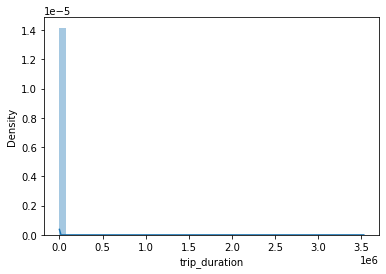

In [40]:
# Plotting distribution plot
sns.distplot(taxi_data['trip_duration'])

Too much outliers present in the data , thats why it is not visualising properly, lets, see the log distribution of this feature. 

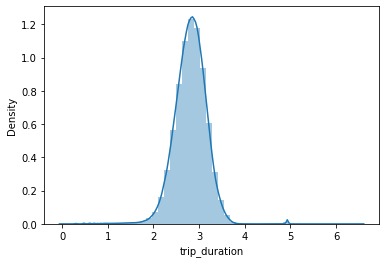

In [42]:
sns.distplot(np.log10(taxi_data['trip_duration']))

 Now, we will split the pickup date time column into month , year, date, day of the week , minute , second  and hour

In [43]:
import datetime
taxi_data['pickup_year'] = taxi_data['pickup_datetime'].dt.year # Extracting year from date time
taxi_data['pickup_month'] = taxi_data['pickup_datetime'].dt.month # Extracting month from date time
taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.day # Extracting date from date time
taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour # Extracting hour from date time
taxi_data['pickup_minute'] = taxi_data['pickup_datetime'].dt.minute # Extracting minute from date time
taxi_data['pickup_second'] = taxi_data['pickup_datetime'].dt.second # Extracting second from date time
taxi_data['pickup_day'] = taxi_data['pickup_datetime'].dt.day_name() # Extracting day name from date time

Visualizing Number of Trips count by days of week 

Text(0.5, 1.0, 'Number of trips in week days')

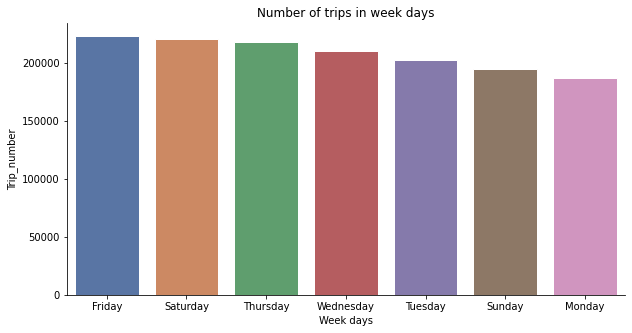

In [44]:
weekdays_number= taxi_data.pickup_day.value_counts().reset_index()
# Plotting graph
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_theme(style="whitegrid")
ax= sns.barplot(x='index',y='pickup_day',data=weekdays_number )
ax.set_ylabel("Trip_number")
ax.set_xlabel("Week days")
plt.title("Number of trips in week days")

Friday have the most number of trips , ofcourse it is natural beacuse , it is weekend

 Now will check Average duration of trips by days of the week

In [45]:
avg_duration_day= taxi_data.groupby(['pickup_day'])['trip_duration'].mean().reset_index().rename(columns={'trip_duration':'avg_trip_duration'}).sort_values(by = "avg_trip_duration" , ascending=False ,ignore_index=True)

In [46]:
avg_duration_day

,pickup_day,avg_trip_duration
0,Thursday,1006.528654
1,Friday,990.224200
2,Tuesday,983.463124
3,Wednesday,975.450494
4,Saturday,948.051175
5,Sunday,901.639395
6,Monday,897.947839


Thursday have the most trip duration , Lets visualize it by pie chart

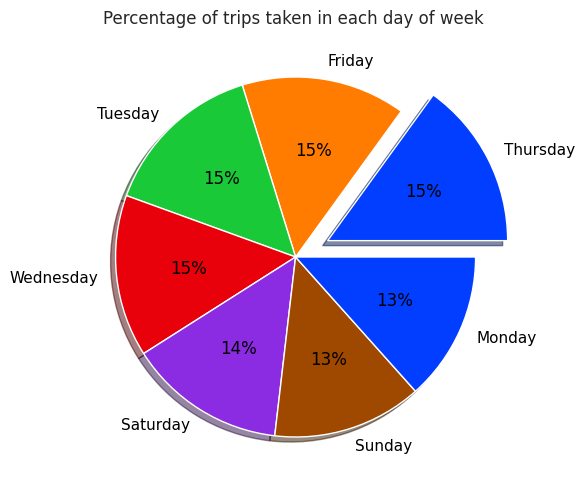

In [47]:
fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
# plotting pie chart
explode = [0]*7
explode[0] = 0.2
colors = sns.color_palette('bright')[0:6]
z= avg_duration_day['pickup_day'].to_list()
plt.rcParams['text.color'] = 'black'
plt.pie(x=avg_duration_day['avg_trip_duration'],explode=explode,labels=z,labeldistance=1.1,colors=colors,shadow=True,textprops=dict(color="black"),autopct='%1.0f%%')
plt.title("Percentage of trips taken in each day of week ")
plt.show()

Now,  will use number of to replace these days. Change the categorical column to numerical. 

In [48]:
# one Hot encoding
encode_day= {'pickup_day':{'Monday':1,'Tuesday':2,'Wednesday':3,'Tuesday':4,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},}
# replacing the date name with number
taxi_data=taxi_data.replace(encode_day)

Lets see, which hours of day have more pickup . 

Text(0.5, 1.0, 'Pickup Hours Distribution')

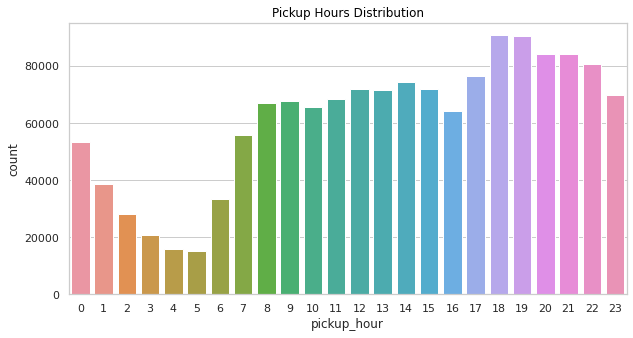

In [49]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=taxi_data['pickup_hour'])
ax.set_title("Pickup Hours Distribution")

6 pm and 7pm of the evening time are the rush hour, people return the time to home from work, it makes sense. 

Lets, visualise , the store_and_fwd_flag with trip duration by violinplot. 

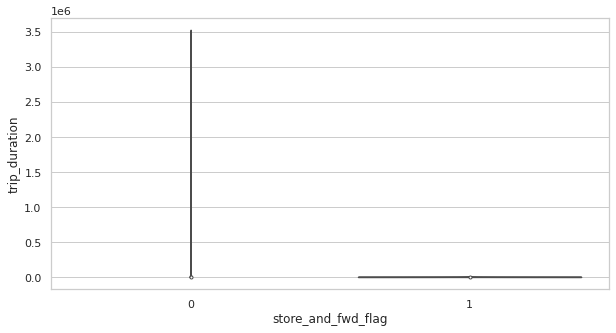

In [50]:
plt.figure(figsize=(10,5))
sns.violinplot(x= 'store_and_fwd_flag', y= 'trip_duration', data= taxi_data)

In above plot , we are observing that, the value 1 has median trip duration less than 1000 sec and same follows as 0 value. According to the graph,mostly distributed portion around median value . 


We have distance and we have trip duration , now we can calculate the average speed of every trip. 

In [51]:
taxi_data['avg_speed(km/hr)']= round((((taxi_data['distance']*1000)/taxi_data['trip_duration'])*3600)/1000,2) # calculating speed in km/hour

Checking the relation between Average speed and trip duration. 

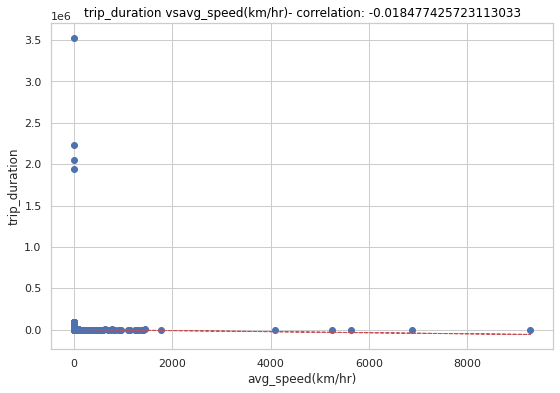

In [52]:
fig = plt.figure(figsize=(9, 6)) # Plotting the scatter plot. 
ax = fig.gca()
feature = taxi_data['avg_speed(km/hr)']
label = taxi_data['trip_duration']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('avg_speed(km/hr)')
plt.ylabel('trip_duration')
ax.set_title('trip_duration vs' +'avg_speed(km/hr)' + '- correlation: ' + str(correlation))
z = np.polyfit(taxi_data['avg_speed(km/hr)'], taxi_data['trip_duration'], 1)
y_hat = np.poly1d(z)(taxi_data['avg_speed(km/hr)'])
plt.plot(taxi_data['avg_speed(km/hr)'], y_hat, "r--", lw=1)

plt.show()

## **Handling Outliers**

In a day , there are 86400 seconds, so more than 86400 seconds trip duration is not possible. 

In [53]:
# Checking the trip duration which is more than 1 day.
taxi_data[taxi_data['trip_duration']>86400] 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_minute,pickup_second,pickup_day,avg_speed(km/hr)
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,0,1939736,20.160235,2016,1,5,0,19,42,4,0.04
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,0,2049578,5.992874,2016,2,13,22,38,0,6,0.01
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,0,2227612,1.633027,2016,1,5,6,14,15,4,0.00
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,19.926608,2016,2,13,22,46,52,6,0.02


We will exclude this rows , also distance is not much, it may be trips for few days. 

Lets, plot the boxplot of the trip duration , for detecting the outliers. 

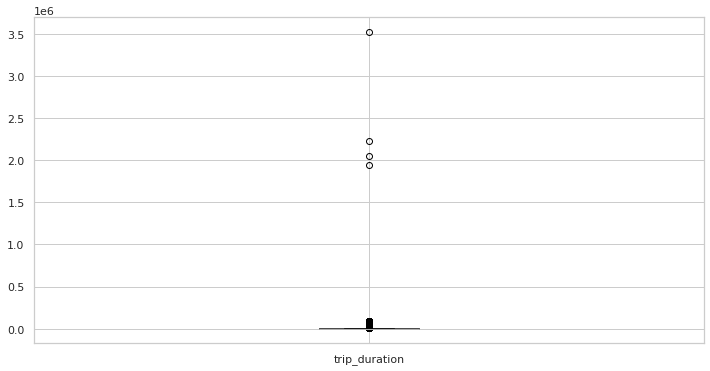

In [54]:
# plotting box plot
plt.figure(figsize=(12, 6))
taxi_data.boxplot(column='trip_duration')

Lets, drop these outliers .

In [55]:
# Finding 
upper_lim = taxi_data['trip_duration'].quantile(.998)
upper_lim

5551.71399999992

In [56]:
taxi_data=taxi_data[taxi_data['trip_duration']<upper_lim]

In [57]:
taxi_data.shape

(1455726, 20)

Inspecting outliers of avrage speed. 

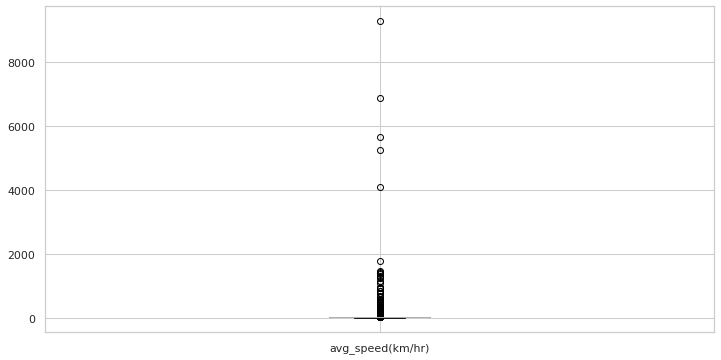

In [58]:
plt.figure(figsize=(12, 6))
taxi_data.boxplot(column='avg_speed(km/hr)')

Average Speed greater than 180 km is not possible , so lets see which rows have average speed more than 180 km 

In [59]:
taxi_data[taxi_data['avg_speed(km/hr)']>180]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_minute,pickup_second,pickup_day,avg_speed(km/hr)
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,0,2,0.703342,2016,6,23,13,36,48,4,1266.01
107171,id1656254,2,2016-01-18 00:35:38,2016-01-18 00:35:54,1,-73.805527,40.651360,-73.804230,40.661629,0,16,1.145626,2016,1,18,0,35,38,1,257.77
133641,id2362780,2,2016-06-30 05:01:03,2016-06-30 05:01:11,1,-74.164268,40.711639,-74.179352,40.711342,0,8,1.274983,2016,6,30,5,1,3,4,573.74
171801,id1733307,2,2016-06-26 18:02:38,2016-06-26 18:02:50,1,-73.792725,40.656902,-73.788948,40.647270,0,12,1.116290,2016,6,26,18,2,38,7,334.89
176589,id1724402,1,2016-05-17 06:34:59,2016-05-17 06:36:27,1,-73.969231,40.798122,-73.999260,40.753773,0,88,5.539157,2016,5,17,6,34,59,4,226.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328401,id1644758,2,2016-01-03 14:41:12,2016-01-03 14:44:19,1,-73.999992,40.689610,-73.965492,40.806030,0,187,13.252680,2016,1,3,14,41,12,7,255.13
1359910,id3628988,1,2016-05-05 18:21:37,2016-05-05 18:30:45,1,-79.569733,41.586273,-80.355431,42.090183,0,548,85.972969,2016,5,5,18,21,37,4,564.79
1390507,id3141426,2,2016-05-06 18:29:00,2016-05-06 18:29:05,1,-73.874718,40.730610,-73.867432,40.732868,0,5,0.664623,2016,5,6,18,29,0,5,478.53
1398157,id2905190,2,2016-03-05 00:17:29,2016-03-05 00:17:32,1,-74.003487,40.732609,-74.004189,40.731274,0,3,0.159683,2016,3,5,0,17,29,6,191.62


some average speed was too much , like 250 km/hour, which was practically impossible. 

In [60]:
taxi_data= taxi_data[taxi_data['avg_speed(km/hr)']<100]

we can see here that trip duration was so small , which was practically impossible, so we exclude rows of those, whose trip duration which was less than 30 seconds and which average speed was more than 180 km

In [61]:
taxi_data=taxi_data[taxi_data['trip_duration']>30]

In [62]:
taxi_data=taxi_data[(taxi_data.passenger_count != 0)]
taxi_data[taxi_data['trip_duration'] == 0]
taxi_data= taxi_data[taxi_data['avg_speed(km/hr)'] != 0]

outlier detection, 

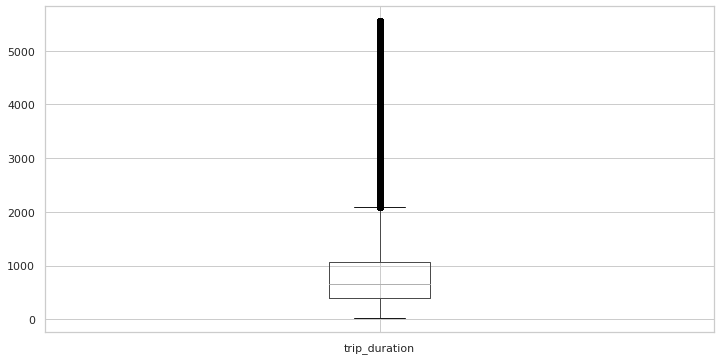

In [63]:
plt.figure(figsize=(12, 6))
taxi_data.boxplot(column='trip_duration')

In trip duration, there are some of the outliers. so we will see which of duration is more than one day. 

In [64]:
taxi_data[taxi_data['avg_speed(km/hr)'] == 0].shape

(0, 20)

In [65]:
taxi_data= taxi_data[taxi_data['avg_speed(km/hr)'] != 0]

In [66]:
taxi_data[(taxi_data.distance == 0)].shape

(0, 20)

In [67]:
taxi_data[(taxi_data.distance == 0) & (taxi_data['avg_speed(km/hr)'] == 0)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_minute,pickup_second,pickup_day,avg_speed(km/hr)


we can see some of these duration are several days , so we use Log transformation of the trip duration results in a normal distribution.

Lets see the trip duration after dropping so me of the outliers. 

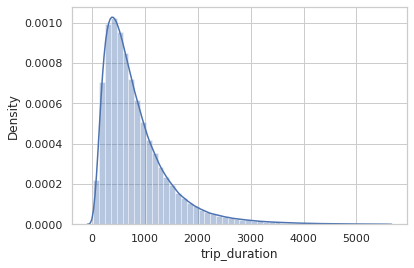

In [68]:
sns.distplot(
    taxi_data['trip_duration']
    )

In [69]:
taxi_data.shape

(1446194, 20)

Text(0.5, 1.0, 'Distribution of trip duration (sec) in Log Scale')

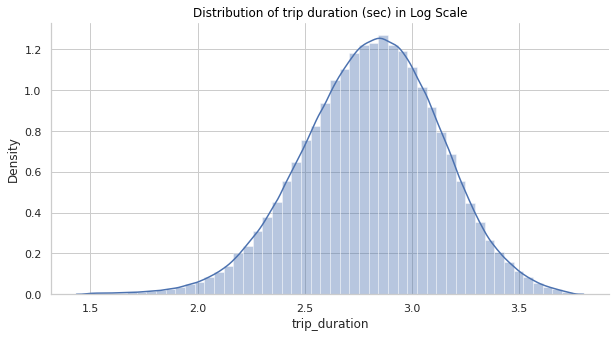

In [70]:
#log transformation
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.distplot(
    np.log10(taxi_data['trip_duration']))
plt.title("Distribution of trip duration (sec) in Log Scale")

In [71]:
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_minute,pickup_second,pickup_day,avg_speed(km/hr)
count,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1446194.0,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06,1.446194e+06
mean,1.534209e+00,1.664561e+00,-7.397371e+01,4.075103e+01,-7.397359e+01,4.075190e+01,5.456391e-03,8.370838e+02,3.450237e+00,2016.0,3.516233e+00,1.550364e+01,1.360927e+01,2.959309e+01,2.947340e+01,4.327920e+00,1.446121e+01
std,4.988285e-01,1.313891e+00,6.785742e-02,2.816056e-02,6.671345e-02,3.244017e-02,7.366561e-02,6.441745e+02,3.928680e+00,0.0,1.680860e+00,8.703623e+00,6.399449e+00,1.732513e+01,1.731957e+01,1.776857e+00,7.679745e+00
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.738930e+01,-1.219333e+02,3.738910e+01,0.000000e+00,3.100000e+01,4.236098e-04,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073744e+01,-7.399133e+01,4.073598e+01,0.000000e+00,3.990000e+02,1.245882e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.400000e+01,3.000000e+00,9.200000e+00
50%,2.000000e+00,1.000000e+00,-7.398177e+01,4.075416e+01,-7.397978e+01,4.075457e+01,0.000000e+00,6.640000e+02,2.106847e+00,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2.900000e+01,4.000000e+00,1.285000e+01
75%,2.000000e+00,2.000000e+00,-7.396748e+01,4.076837e+01,-7.396314e+01,4.076984e+01,0.000000e+00,1.074000e+03,3.889032e+00,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.400000e+01,6.000000e+00,1.789000e+01
max,2.000000e+00,6.000000e+00,-7.309228e+01,4.169680e+01,-7.272073e+01,4.169335e+01,1.000000e+00,5.551000e+03,1.018582e+02,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,7.000000e+00,9.978000e+01


In [72]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_year,pickup_month,pickup_date,pickup_hour,pickup_minute,pickup_second,pickup_day,avg_speed(km/hr)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.502172,2016,3,14,17,24,55,1,11.89
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.808660,2016,6,12,0,43,35,7,9.82
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.379687,2016,1,19,11,35,24,4,10.81
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.483632,2016,4,6,19,32,31,3,12.45
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.187038,2016,3,26,13,30,55,6,9.82


In [73]:
taxi_data['pickup_longitude']= round(taxi_data['pickup_longitude'],3)
taxi_data['pickup_latitude']= round(taxi_data['pickup_latitude'],3)
taxi_data['dropoff_longitude']= round(taxi_data['dropoff_longitude'],3)
taxi_data['dropoff_latitude']= round(taxi_data['dropoff_latitude'],3)


In [74]:
col_to_drop= ['id','pickup_year','avg_speed(km/hr)','pickup_datetime','dropoff_datetime']
taxi_df= taxi_data.drop(col_to_drop, axis=1)

In [75]:
taxi_df = pd.get_dummies(taxi_df, columns=["pickup_day", "pickup_hour"], prefix=["day", "hour"])

In [76]:
taxi_df.shape

(1446194, 43)

In [77]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446194 entries, 0 to 1458643
Data columns (total 43 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1446194 non-null  int64  
 1   passenger_count     1446194 non-null  int64  
 2   pickup_longitude    1446194 non-null  float64
 3   pickup_latitude     1446194 non-null  float64
 4   dropoff_longitude   1446194 non-null  float64
 5   dropoff_latitude    1446194 non-null  float64
 6   store_and_fwd_flag  1446194 non-null  int64  
 7   trip_duration       1446194 non-null  int64  
 8   distance            1446194 non-null  float64
 9   pickup_month        1446194 non-null  int64  
 10  pickup_date         1446194 non-null  int64  
 11  pickup_minute       1446194 non-null  int64  
 12  pickup_second       1446194 non-null  int64  
 13  day_1               1446194 non-null  uint8  
 14  day_3               1446194 non-null  uint8  
 15  day_4          

In [78]:
taxi_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_date,pickup_minute,pickup_second,day_1,day_3,day_4,day_5,day_6,day_7,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
vendor_id,1.000000,0.287540,0.008554,0.002650,0.001835,0.005014,-0.079323,0.007174,0.009342,-0.006416,0.000731,-0.000354,0.001075,-0.000323,-0.001396,0.000262,-0.001476,0.000120,0.002844,0.001514,-0.001514,-0.005650,-0.007941,-0.006277,-0.007933,-0.006664,-0.001458,0.000430,0.002187,0.004266,0.004010,0.001155,-0.003110,-0.004005,-0.005158,-0.001096,0.002929,0.005028,0.002921,0.002605,0.003325,0.002723,0.000837
passenger_count,0.287540,1.000000,0.002454,-0.004843,-0.000106,-0.002426,-0.021690,0.014419,0.010716,-0.002462,0.001984,0.000979,0.000979,-0.008938,-0.009884,-0.013280,-0.000881,0.020766,0.015726,0.004101,0.005538,0.004326,0.003911,0.003410,-0.006549,-0.014780,-0.013434,-0.009528,-0.006887,-0.001601,0.000135,0.000353,0.001736,0.003235,0.001428,0.002210,0.000151,0.000009,0.000321,0.001721,0.004567,0.006369,0.005429
pickup_longitude,0.008554,0.002454,1.000000,0.041733,0.778975,0.129882,0.010711,0.203699,0.289816,0.004801,-0.001256,-0.002703,0.000560,0.017437,-0.001155,0.003696,-0.003486,-0.017843,0.001605,-0.006549,-0.014948,-0.019066,-0.017210,-0.007899,0.007282,0.009172,0.008248,0.001354,-0.001274,0.002408,0.001905,-0.000516,0.000393,0.006577,0.009315,0.012787,0.009643,-0.002930,-0.003825,-0.000528,-0.003293,-0.004435,-0.000789
pickup_latitude,0.002650,-0.004843,0.041733,1.000000,0.150793,0.431549,-0.009390,-0.234377,-0.313805,-0.002208,-0.007110,0.000693,0.000452,0.007024,0.015419,0.019934,0.004325,-0.026051,-0.026489,-0.052782,-0.052866,-0.047024,-0.039748,-0.021682,-0.008386,-0.000544,0.027236,0.031465,0.028605,0.031130,0.026785,0.026073,0.019288,0.016876,0.018390,0.014346,0.018169,0.014680,0.001431,-0.016714,-0.021976,-0.030817,-0.044690
dropoff_longitude,0.001835,-0.000106,0.778975,0.150793,1.000000,0.177806,0.007972,0.122838,0.198770,0.005256,-0.000925,-0.002977,0.000130,0.004790,-0.002478,-0.000140,0.000354,-0.008578,0.006692,0.008633,0.010045,0.008904,0.013423,0.027104,0.028651,0.015788,0.004567,-0.005999,-0.011736,-0.008384,-0.007539,-0.004947,-0.004390,0.001390,0.002882,0.003608,-0.001684,-0.009869,-0.011159,-0.007922,-0.004144,-0.001330,0.004772
dropoff_latitude,0.005014,-0.002426,0.129882,0.431549,0.177806,1.000000,-0.010601,-0.181824,-0.156673,-0.000828,-0.006049,0.001924,-0.000087,0.008377,0.010048,0.011508,0.000184,-0.019736,-0.013331,-0.032155,-0.027716,-0.026952,-0.022630,-0.019045,-0.014841,0.003046,0.018603,0.009737,0.004570,0.013435,0.012424,0.013799,0.010905,0.011865,0.017275,0.015868,0.017053,0.009345,0.000773,-0.006889,-0.009592,-0.016170,-0.026945
store_and_fwd_flag,-0.079323,-0.021690,0.010711,-0.009390,0.007972,-0.010601,1.000000,0.028255,0.029569,0.000443,0.001198,0.000114,0.001479,0.001981,0.000954,0.001697,0.001229,-0.002938,-0.003397,-0.002503,-0.001258,-0.001183,-0.000454,-0.001092,-0.001102,-0.001807,-0.003071,-0.001028,-0.000785,-0.001019,0.000598,0.001263,0.002667,0.003655,0.003134,0.004536,0.003218,0.000216,0.000107,-0.002190,-0.003652,-0.000564,-0.000606
trip_duration,0.007174,0.014419,0.203699,-0.234377,0.122838,-0.181824,0.028255,1.000000,0.771906,0.059206,0.011298,-0.010868,-0.000217,-0.016030,0.026490,0.039739,0.018767,-0.037517,-0.044813,-0.016296,-0.024633,-0.028912,-0.024553,-0.015943,-0.018983,-0.039164,-0.026298,-0.001187,0.002458,0.004113,0.013809,0.014949,0.021271,0.039027,0.044075,0.040474,0.033881,0.009967,-0.018119,-0.025610,-0.022617,-0.011540,-0.007753
distance,0.009342,0.010716,0.289816,-0.313805,0.198770,-0.156673,0.029569,0.771906,1.000000,0.016489,0.006726,-0.009019,0.000595,0.012402,-0.010822,-0.009154,-0.005235,-0.011511,0.028814,0.028524,0.021792,0.015532,0.02101

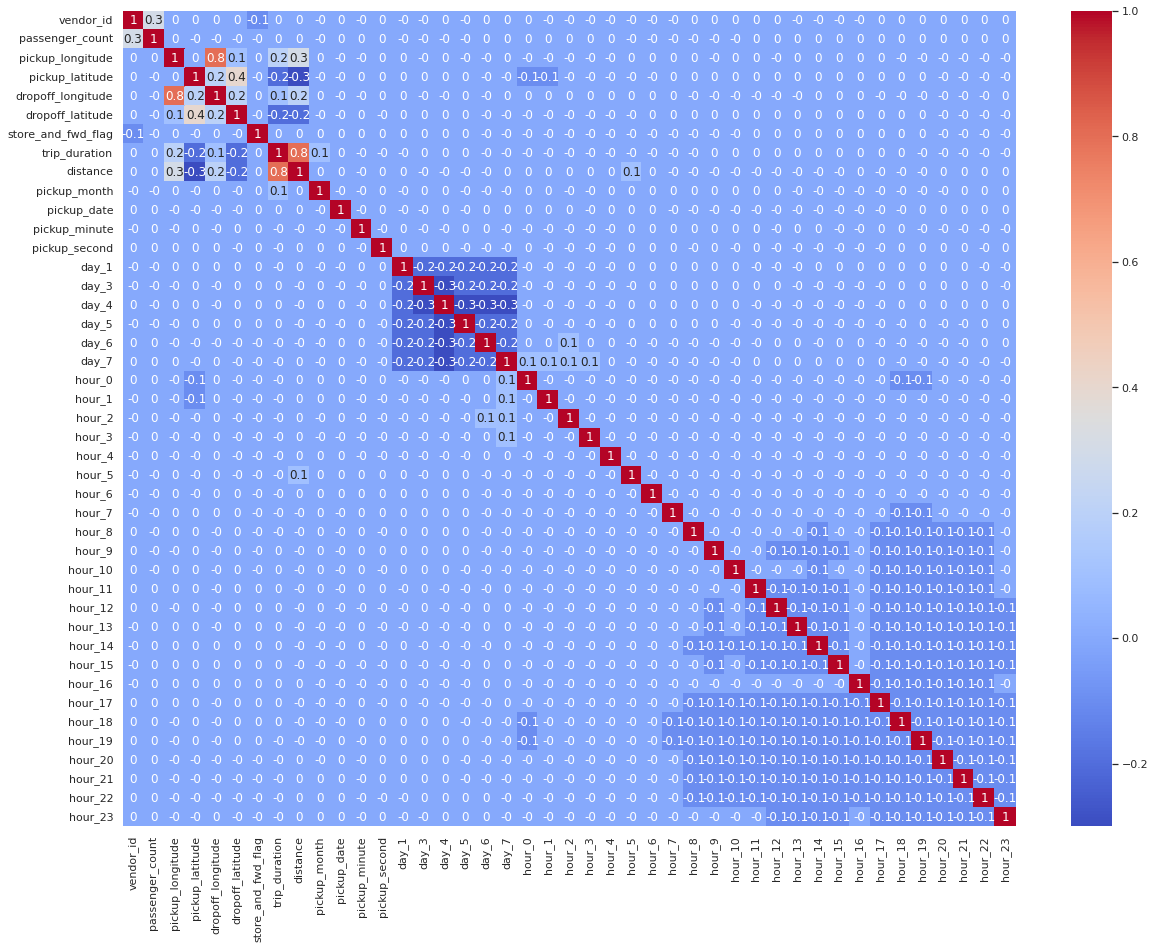

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(round(taxi_df.corr(),1),annot=True,cmap='coolwarm')

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [81]:
from scipy.stats import zscore

In [82]:
X= taxi_df.drop(['trip_duration'],axis=1).apply(zscore)
y= (taxi_df['trip_duration'])

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 32)

In [ ]:
scale = MinMaxScaler()
X_train= scale.fit_transform(X_train)
x_test= scale.transform(X_test)

In [ ]:
scale_ = StandardScaler()
X_train= scale_.fit_transform(X_train)
x_test= scale_.transform(X_test)

In [84]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
train_pred= reg.predict(X_train)

In [86]:
test_pred= reg.predict(X_test)

In [87]:
mean_squared_error(y_test, test_pred)

149283.7603066344

In [197]:
mean_squared_error((y_train), (train_pred))

148267.94491385797

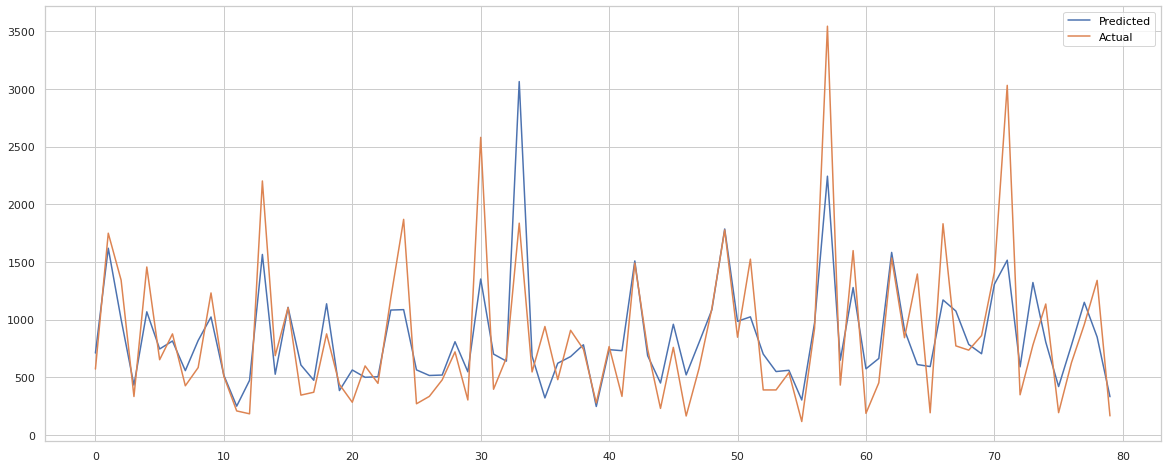

In [198]:
plt.figure(figsize=(20,8))
plt.plot((test_pred[20:100]))
plt.plot(np.array((y_test[20:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [199]:
reg.score(X_train, y_train)

0.6428860512625683

In [200]:
r2_score((y_train), (train_pred))

0.6428860512625683

In [74]:
r2_score((y_test), (test_pred))

0.6271348266656986

In [ ]:
r2_score((10**(y_test)) , (10**(test_pred)))

-9.199200620247933e+27

In [ ]:
r2_score((10**(y_test[180000:200000])) , (10**(test_pred[180000:200000])))

-1.0408382777438163e-05

In [ ]:
10**(y_test[100000:200000])

913696     0
1328064    0
350427     0
1261315    0
1417206    0
          ..
1374007    0
1230319    0
617573     0
642377     0
284599     0
Name: trip_duration, Length: 100000, dtype: int64

In [ ]:
10**(test_pred[171840:171850])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
1-((1- r2_score((y_test), (test_pred)))*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))

0.5271890729675062

In [ ]:
mean_absolute_error(10**(y_test), 10**(test_pred))

1.4749178170546168e+16

In [ ]:
reg.intercept_

-3264.7716651292635

In [ ]:
reg.coef_

array([-3.09750164e+00,  3.24662783e+00, -8.30212826e+02,  8.67810580e+02,
        4.54352929e+02, -1.46227804e+03,  3.37176898e+00,  1.14399772e+02,
        1.18112040e+01,  4.46182700e-01, -1.11498728e-01,  2.49565014e-03,
       -3.45996624e+01,  4.40293451e+01,  3.93847712e+01,  3.82291963e+01,
       -1.26268182e+01, -7.44168320e+01, -5.71453498e+01, -8.61320467e+01,
       -1.03120253e+02, -1.30455333e+02, -1.99266252e+02, -2.89746255e+02,
       -2.01972285e+02, -4.97765431e+01,  6.35958632e+01,  9.02011217e+01,
        9.39293911e+01,  1.12066602e+02,  1.19638552e+02,  1.14694346e+02,
        1.25211459e+02,  1.25069746e+02,  1.04319881e+02,  1.10619416e+02,
        9.84535016e+01,  4.49125652e+01, -7.14846704e+00, -2.07818064e+01,
       -1.57271322e+01, -4.14407204e+01])

In [88]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.01 )

lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
lasso.score(X_train, y_train)

0.6428853882129684

In [90]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor= lasso_reg.fit(X_train, y_train)

In [92]:
save_model_ = open("/content/drive/MyDrive/almabetter/lasso.pickle","wb")
pickle.dump(lasso_regressor, save_model_)
save_model_.close()

In [ ]:
model = open("/content/drive/MyDrive/almabetter/lasso.pickle", "rb")
ridge = pickle.load(model)
model.close()

In [94]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -148373.66769061316


In [93]:
y_pred_lasso = lasso_regressor.predict(X_test)

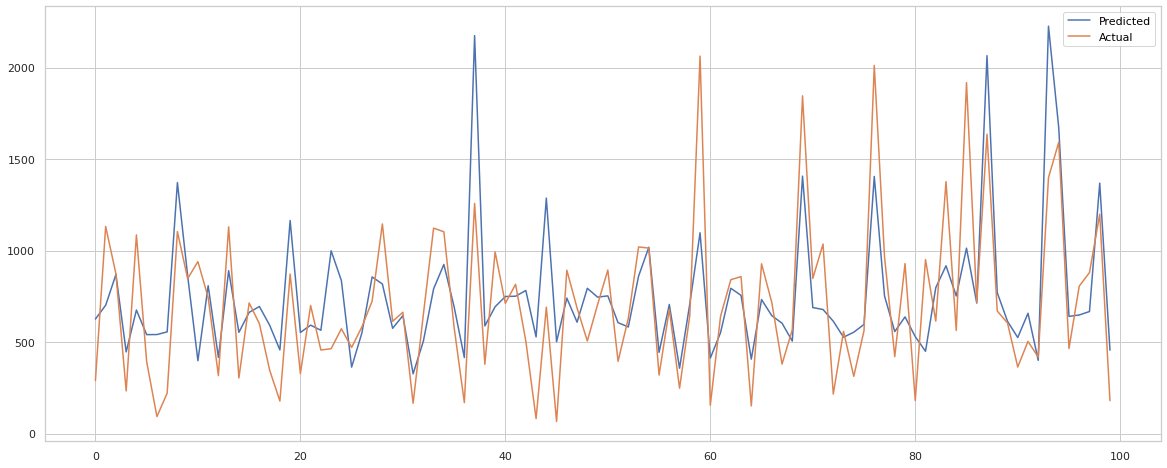

In [ ]:
plt.figure(figsize=(20,8))
plt.plot((y_pred_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [95]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 149281.8781333346
RMSE : 386.3701310056648
R2 : 0.6394738673403424
Adjusted R2 :  0.6394215080491638


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters_2 = {'alpha': [1e-4,1e-3,1e-2,1,5]}
ridge_reg = GridSearchCV(ridge, parameters_2, scoring='neg_mean_squared_error', cv=5)
ridge_regressor= ridge_reg.fit(X_train,y_train)

In [ ]:
save_model_1 = open("/content/drive/MyDrive/almabetter/ridge.pickle","wb")
pickle.dump(ridge_regressor, save_model_1)
save_model_1.close()

In [ ]:
model1 = open("/content/drive/MyDrive/almabetter/ridge.pickle", "rb")
ridge = pickle.load(model1)
model1.close()

In [106]:
print("The best fit alpha value is found out to be :" , ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -159740.76367567695


In [107]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [108]:
r2_score(y_test,y_pred_ridge)

0.6394753339596642

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

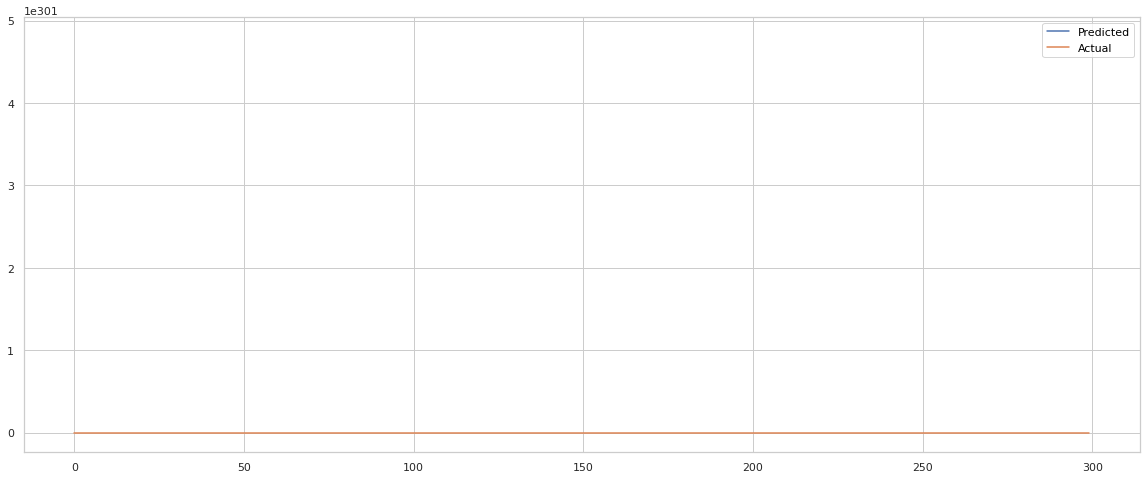

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(10**(y_pred_ridge )[:300])
plt.plot(10**(np.array(y_test))[:300])
plt.legend(["Predicted","Actual"])
plt.show()

In [92]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.4)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
elasticnet.score(X_test, y_test)

0.6239696836267314

In [78]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [241]:
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters_3 = {'alpha': [1e-3,1e-2,1e-1,1],'l1_ratio':[0.2,0.3,0.4],'max_iter':[100]}
elastic_reg = GridSearchCV(elastic, parameters_3, scoring='neg_mean_squared_error',cv=5)
elastic_regressor= elastic_reg.fit(X_train, y_train)

In [247]:
save_model_2 = open("/content/drive/MyDrive/almabetter/elastic.pickle","wb")
pickle.dump(elastic_regressor, save_model_2)
save_model_2.close()

In [109]:
model_2 = open("/content/drive/MyDrive/almabetter/elastic.pickle", "rb")
elastic_regressor= pickle.load(model_2)
model_2.close()

In [110]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.2, 'max_iter': 100}

Using  {'alpha': 0.1, 'l1_ratio': 0.2, 'max_iter': 100}  the negative mean squared error is:  -150763.14231896438


In [111]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [112]:
r2_score(y_test,y_pred_elastic)

0.6349768185567046

In [113]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 151143.95643408404
RMSE : 388.7723709757215
R2 : 0.6349768185567046
Adjusted R2 :  0.6349238061581216


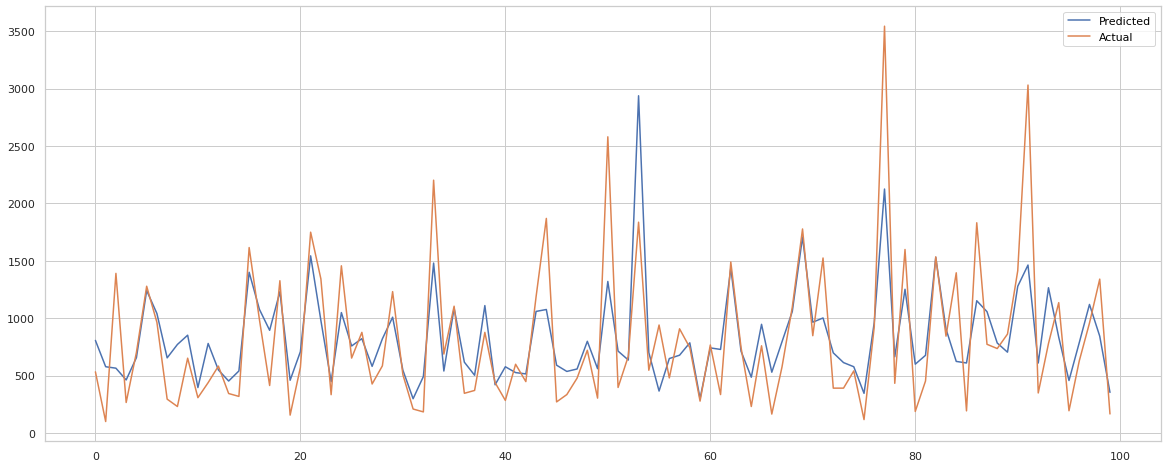

In [252]:
plt.figure(figsize=(20,8))
plt.plot((y_pred_elastic)[:100])
plt.plot((np.array(y_test))[:100])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb= XGBRegressor()
grid_values= {'n_estimators':[100], 'max_depth':[6,7], 'eta':[0.01], 'colsample_bytree':[0.8]}
Regressor = GridSearchCV(xgb, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=3)
xgb_reg= Regressor.fit(X_train, y_train)

[14:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:57:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
save_model_3 = open("/content/drive/MyDrive/almabetter/xgbregressor.pickle","wb")
pickle.dump(xgb_reg, save_model_3)
save_model_3.close()

In [114]:
model_3 = open("/content/drive/MyDrive/almabetter/xgbregressor.pickle", "rb")
xgb_reg= pickle.load(model_3)
model_3.close()

[10:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
x= xgb_reg.best_estimator_

In [116]:
y_pred_xg= x.predict(X_test)
r2_score((y_test),(y_pred_xg))

0.7742601916781274

In [117]:
y_pred_xgb= xgb_reg.predict(X_test)
r2_score((y_test),(y_pred_xgb),multioutput='variance_weighted')


0.7742601916781274

In [118]:
1-(1- r2_score((y_test),(y_pred_xg)))*(X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)

0.7742274074350898

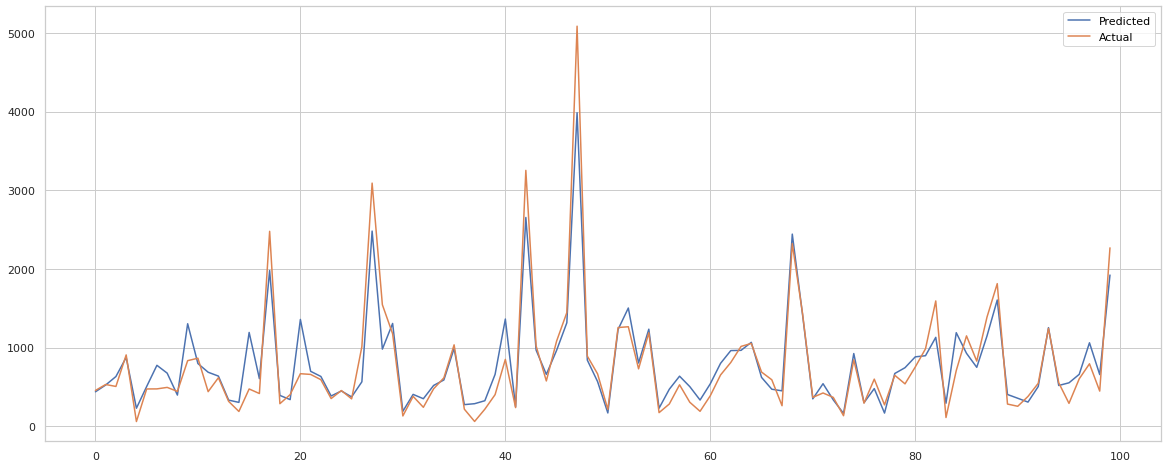

In [119]:
plt.figure(figsize=(20,8))
plt.plot((y_pred_xgb)[400:500])
plt.plot((np.array(y_test))[400:500])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
print("The best fit values is found out to be :" ,Regressor.best_params_)


The best fit values is found out to be : {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'n_estimators': 100}


In [104]:
mean_squared_error((y_test), (y_pred_xgb))

81657.54172551582

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred_x= xgb.predict(X_test)

In [ ]:
xgb.score(X_test,y_test)

In [ ]:
r2_score(10**(y_test),10**(y_pred_x))

In [ ]:
from xgboost import plot_tree
_, ax = plt.subplots(figsize=(20,8)) # Resize figure
plot_tree(xgb,rankdir='LR',ax=ax)
plt.show()

In [120]:

from sklearn.experimental    import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

histogram_gradient_boosting = HistGradientBoostingRegressor()
'''grids= {'n_estimators':[100], 'max_depth':[3, 5, 7],'learning_rate':[20,10,5,1,0.1,0.01,0.001]}

cv_results_hgbdt = GridSearchCV(histogram_gradient_boosting,grids,cv=3)'''
histogram_gradient_boosting.fit(X_train,y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [121]:
y_pred_gbr= histogram_gradient_boosting.predict(X_test)

In [122]:
histogram_gradient_boosting.score(X_test,y_test)

0.7780053405164031

In [123]:
r2_score(y_test,y_pred_gbr)

0.7780053405164031

In [211]:
mean_squared_error((y_test), (y_pred_gbr))

91915.78363681669

In [112]:
mean_absolute_error((y_test), (y_pred_gbr))

193.1332827123956

In [125]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor is not good choie for regression because it bound the limit of predicted value. 


In [126]:
RF= RandomForestRegressor(n_estimators=20, random_state=42)
RF_reg= RF.fit(X_train,y_train)

In [ ]:
save_model_4 = open("/content/drive/MyDrive/almabetter/rf_reg.pickle","wb")
pickle.dump(RF_reg, save_model_4)
save_model_4.close()

In [124]:
model_4 = open("/content/drive/MyDrive/almabetter/rf_reg.pickle", "rb")
RF_reg= pickle.load(model_4)
model_4.close()

In [125]:
y_pred_rf= RF_reg.predict(X_test)

In [126]:
mean_squared_error((y_test), (y_pred_rf))

92263.89367426245

In [127]:
r2_score(y_test, y_pred_rf)

0.7771762709148555

In [133]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV


In [134]:
lgb_reg= LGBMRegressor()
grid_values_= {'n_estimators':[1000],  'learning_rate ':[0.01,0.001,0.0001,1]}
lgb_Regressor = GridSearchCV(lgb_reg, param_grid = grid_values_, scoring = 'neg_mean_squared_error', cv=3)
lgb_ = lgb_Regressor.fit(X_train, y_train)


In [140]:
save_model_5 = open("/content/drive/MyDrive/almabetter/lgb.pickle","wb")
pickle.dump(lgb_, save_model_5)
save_model_5.close()

In [141]:
model_5 = open("/content/drive/MyDrive/almabetter/lgb.pickle", "rb")
lgb_= pickle.load(model_5)
model_5.close()

In [142]:
y_pred_lgb= lgb_.predict(X_test)

In [143]:
r2_score(y_test,y_pred_lgb)

0.8202366510354652

In [131]:
mean_squared_error((y_test), (y_pred_lgb))

74434.02272948917

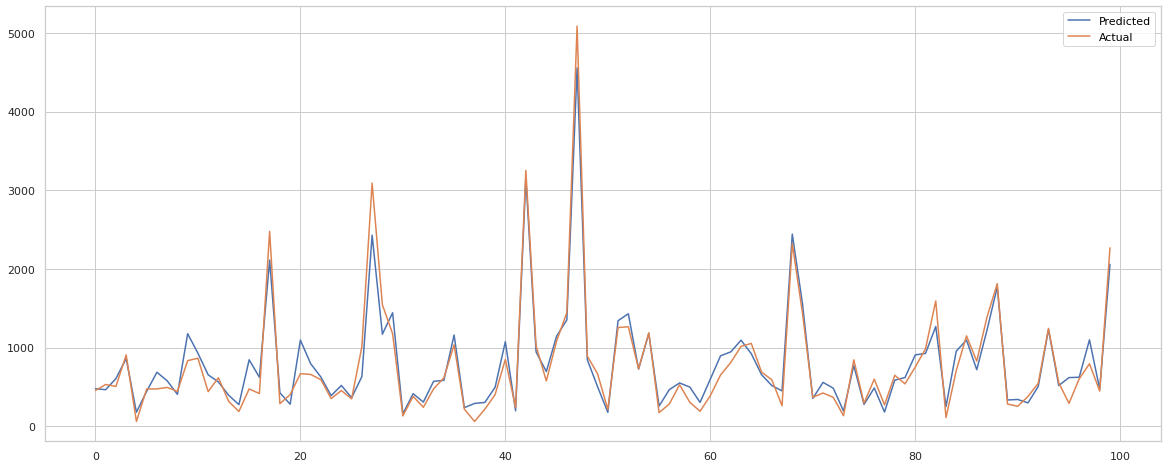

In [137]:
plt.figure(figsize=(20,8))
plt.plot((y_pred_lgb)[400:500])
plt.plot((np.array(y_test))[400:500])
plt.legend(["Predicted","Actual"])
plt.show()

In [220]:
from sklearn.ensemble import AdaBoostRegressor

In [221]:
ada = AdaBoostRegressor(learning_rate=0.001)

In [222]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear',
                  n_estimators=50, random_state=None)

In [231]:
y_pred_ada= ada.predict(X_test)

In [232]:
r2_score(y_test,y_pred_ada)

0.6222115882735071

In [225]:
mean_squared_error((y_test), (y_pred_ada))

156429.61364129453